Basic Classification using Keras.

I am using the CIFAR10 dataset https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt


# First install CIFAR10 from Keras
from tensorflow.keras.datasets import cifar10

(x_training, y_training), (x_test, y_test) = cifar10.load_data()

%matplotlib inline

In [4]:
# Then split 'training' into two subsets: train and validation.
# After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by stratefied sampling.  
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training,
                                                      stratify=y_training, 
                                                      test_size=0.2)

In [5]:
# Obtain the one-hot-vector representation of target (y).
num_classes = 10

y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_valid_bin = keras.utils.to_categorical(y_valid, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)

In [6]:
x_train = x_train / 255
x_valid = x_valid / 255
x_test = x_test / 255

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

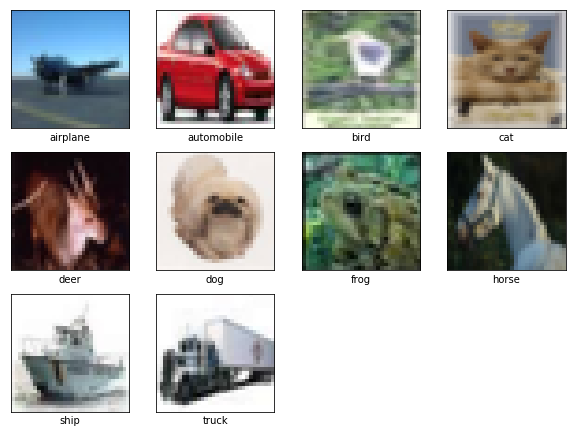

In [8]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_idx = np.where(y_train == i)[0][0]
    plt.imshow(x_train[image_idx])
    plt.xlabel(class_names[y_train[image_idx][0]])

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=(2, 2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_bin, validation_data=(x_valid, y_valid_bin), epochs=30)

In [ ]:
model.summary()

In [ ]:
pd.DataFrame(model.history.history)[['val_acc', 'acc']].plot()

# CNN Experimentation

## More Epochs with Original Architecture

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=(2, 2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

We run this architecture for 100 epochs

In [ ]:
model.fit(x_train, y_train_bin, validation_data=(x_valid, y_valid_bin), epochs=100)

In [ ]:
model.summary()

In [ ]:
pd.DataFrame(model.history.history)[['val_acc', 'acc']].plot()

We see overfitting. As the training accuracy goes up, validation accuracy falls.

## Different Architecture

## Adding a few drop out layers

We add a few drop out layers before and after the first max pool to see whether this would lower overfitting.

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5)))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), kernel_regularizer=keras.regularizers.l2(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.MaxPooling2D(strides=(2, 2)))
model.add(keras.layers.Dropout(.2))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5)))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), kernel_regularizer=keras.regularizers.l2(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.MaxPooling2D(strides=(2, 2)))
model.add(keras.layers.Dropout(.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train_bin, validation_data=(x_valid, y_valid_bin), epochs=50, batch_size=150)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 7s 171us/step - loss: 1.9372 - acc: 0.3836 - val_loss: 1.6204 - val_acc: 0.4657
Epoch 2/50
40000/40000 [==============================] - 6s 160us/step - loss: 1.4889 - acc: 0.5102 - val_loss: 1.4343 - val_acc: 0.5275
Epoch 3/50
40000/40000 [==============================] - 6s 149us/step - loss: 1.3419 - acc: 0.5646 - val_loss: 1.3214 - val_acc: 0.5772
Epoch 4/50
40000/40000 [==============================] - 5s 135us/step - loss: 1.2488 - acc: 0.5973 - val_loss: 1.2595 - val_acc: 0.5950
Epoch 5/50
40000/40000 [==============================] - 6s 139us/step - loss: 1.1850 - acc: 0.6234 - val_loss: 1.1919 - val_acc: 0.6279
Epoch 6/50
40000/40000 [==============================] - 6s 148us/step - loss: 1.1284 - acc: 0.6435 - val_loss: 1.1523 - val_acc: 0.6380
Epoch 7/50
40000/40000 [==============================] - 6s 151us/step - loss: 1.0767 - acc: 0.6638 - val_loss: 1.1490 - 

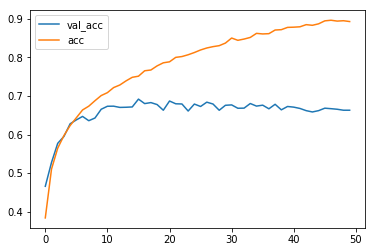

In [42]:
pd.DataFrame(model.history.history)[['val_acc', 'acc']].plot()

# Different Architecture 2

This time we are changing the convolutional filter sizes and adding more of them. We are also adding more dropout layers and a deeper network before final predictions are made. The goal here is to decrease overfitting by generating more generalizable hidden features and increasing randomness with more dropouts.

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', strides=(2, 2)))

model.add(keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', strides=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_bin, validation_data=(x_valid, y_valid_bin), epochs=20, batch_size=100)

In [ ]:
pd.DataFrame(model.history.history)[['val_acc', 'acc']].plot()

# Write predictions for Kaggle submission

In [23]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', strides=(2, 2)))

model.add(keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', strides=(2, 2)))

model.add(keras.layers.AveragePooling2D(pool_size=(6, 6)))
# model.add(keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation='relu'))


model.add(keras.layers.Conv2D(filters=192, kernel_size=(1, 1), activation='relu'))
model.add(keras.layers.Conv2D(filters=10, kernel_size=(1, 1), activation='relu'))


model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train_bin, validation_data=(x_valid, y_valid_bin), epochs=5, batch_size=100)

ValueError: Negative dimension size caused by subtracting 6 from 4 for 'AvgPool_4' (op: 'AvgPool') with input shapes: [?,4,4,96].

In [ ]:
predictions = model.predict(x_test)

In [ ]:
header_cats = []
for i in range(10):
    header_cats = header_cats + [f'cat{i}']

In [ ]:
header = ['id'] + header_cats

In [ ]:
predictions = pd.DataFrame(predictions).reset_index()
predictions.columns = header
predictions['id'] = predictions['id'].shift(-1).fillna(predictions['id'].max() + 1)

In [ ]:
predictions.head()

In [ ]:
predictions['id'] = pd.to_numeric(predictions['id'], downcast='integer')

In [ ]:
predictions.to_csv('hw3/output/predictions.csv', index=False)